### Лабораторная работа №3 "Задача аппроксимации на PyTorch"

In [1]:
import torch
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

**1.** Пример с квадратичной функцией

Необхдимые функции

In [2]:
def loss_func(y,y_pred):
    """Функция потерь"""
    return torch.mean((y - y_pred) ** 2)

In [3]:
def func_x2(x, theta):
    """Квадратное уравнение"""
    return theta[0] + theta[1] * x + theta[2] * x ** 2

In [4]:
def plot_rez(x, y, y_pred, feature=1):
    """Вывод результатов"""
    plt.figure(figsize=(12, 6))
    if len(x.shape) > 1:
        x = x[:, feature]
    plt.scatter(x, y, label='y_true', c='g')
    plt.plot(x, y_pred, label='y_pred', c='r')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [5]:
def plot_peds_vs_targets(y, y_pred):
    """Сравнение предсказаний и разметки"""
    plt.figure(figsize=(12, 12))
    plt.scatter(y, y, c='g')
    plt.scatter(y, y_pred, c='r')
    plt.legend(['targets', 'predictions'])
    plt.xlabel('target y')
    plt.ylabel('predicted y')
    plt.show()

In [6]:
def plot_loss(loss_value):
    """Вывод результатов"""
    plt.figure(figsize=(12, 6))
    plt.plot(loss_value, label = 'y_pred')
    plt.ylabel('loss')
    plt.xlabel('Iteration')
    plt.legend()
    plt.yscale('log')
    plt.show()

In [7]:
def train_proc(X, theta, y, forward_fcn, lr=0.001, num_iter=10):
    """Процесс обучения"""
    loss_value = []
    
    for itr in range(num_iter):
        theta.grad = None # Обнуление градиента     
        loss = loss_func(y, forward_fcn(X, theta)) # Прямой проход искомой функции и расчет функции потерь
        loss.backward() # Расчет градиентов
        loss_value.append(loss.item())
        theta.data -= lr * theta.grad.data # Выполнение градиентного спуска
    
    return theta.data, loss_value

Инициализация входов, выходов и весов

In [8]:
x1, xn, n = 2, 7, 20
theta_true = torch.tensor([3, 1, 3])

X = torch.linspace(x1, xn, n)
y = func_x2(X, theta_true) + torch.randn(X.shape[0]) * 2
theta = torch.rand(3,1).requires_grad_()

Инициализация входов, выходов и весов

MSE optimal = 6.88346


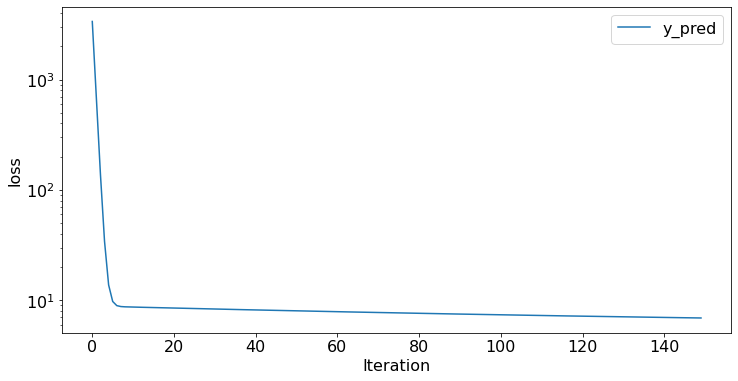

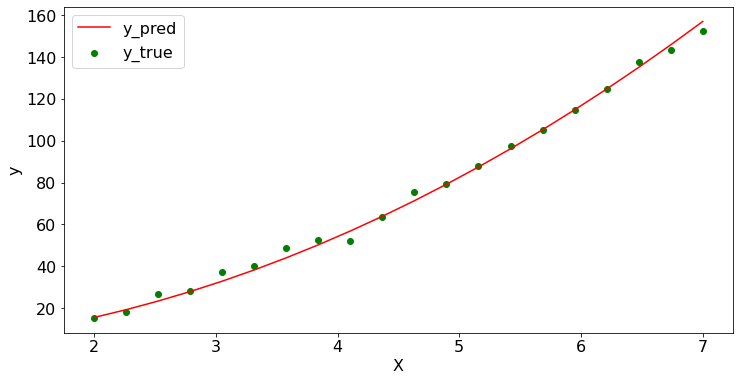

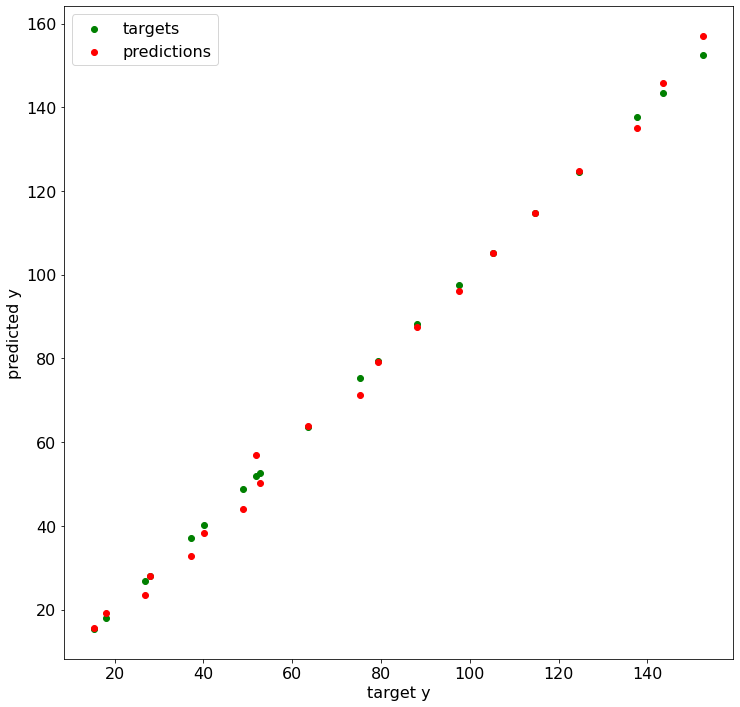

In [9]:
theta_opt, loss_value = train_proc(X, theta, y, forward_fcn=func_x2, lr=0.001, num_iter=150)
y_pred = func_x2(X, theta_opt)
mse_opt = loss_func(y, y_pred)
print('MSE optimal = %.5f' % mse_opt.item())
plot_loss(loss_value)
plot_rez(X, y, y_pred)
plot_peds_vs_targets(y, y_pred)

**2.** Добавьте нормализацию датасета и разбиение на выборки (train_test_split работает и с тензорами)

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


def normalization(X):
    return X

df = fetch_california_housing(as_frame=True)

X = normalization(df.data.copy())
y = df.target

display(X)
display(y)

X = torch.tensor(X.to_numpy())
y = torch.tensor(y.to_numpy())



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344709,0.982119,0.628544,-0.153754,-0.974405,-0.049595,1.052523,-1.327803
1,2.332181,-0.607004,0.327033,-0.263329,0.861418,-0.092510,1.043159,-1.322812
2,1.782656,1.856137,1.155592,-0.049015,-0.820757,-0.025842,1.038478,-1.332794
3,0.932945,1.856137,0.156962,-0.049832,-0.766010,-0.050328,1.038478,-1.337785
4,-0.012881,1.856137,0.344702,-0.032905,-0.759828,-0.085614,1.038478,-1.337785
...,...,...,...,...,...,...,...,...
20635,-1.216099,-0.289180,-0.155020,0.077352,-0.512579,-0.049109,1.801603,-0.758808
20636,-0.691576,-0.845373,0.276874,0.462353,-0.944382,0.005021,1.806285,-0.818702
20637,-1.142566,-0.924829,-0.090316,0.049413,-0.369528,-0.071733,1.778194,-0.823693
20638,-1.054557,-0.845373,-0.040210,0.158774,-0.604415,-0.091223,1.778194,-0.873605


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

**3.** Реализуйте функцию для линейной регрессии вида: $h = theta_1x_1 + theta_2x_2 + ... + theta_nx_n + theta_{n+1}$

In [11]:
def linear_regression(X, theta):
    return 

**4.** Добавьте в процесс обучения разбиение на батчи случайным образом. Необходимо брать нужный срез случайных индексов.

In [12]:
def train_proc(X, theta, y, forward_fcn, lr=0.001, batch_size=64, num_iter=10):
    """Процесс обучения"""
    loss_value = []
    
    for itr in range(num_iter):
        indices = ? # Массив с индексами в случайном порядке
        for batch in range(len(X) // batch_size):
            X_batch, y_batch = (X[indices[?]],
                                y[indices[?]])
            
            theta.grad = None # Обнуление градиента     
            loss = loss_func(y, forward_fcn(X, theta)) # Прямой проход искомой функции и расчет функции потерь
            loss.backward() # Расчет градиентов
            loss_value.append(loss.item())
            theta.data -= lr * theta.grad.data # Выполнение градиентного спуска
    
    return theta.data, loss_value

MSE optimal = 0.55512


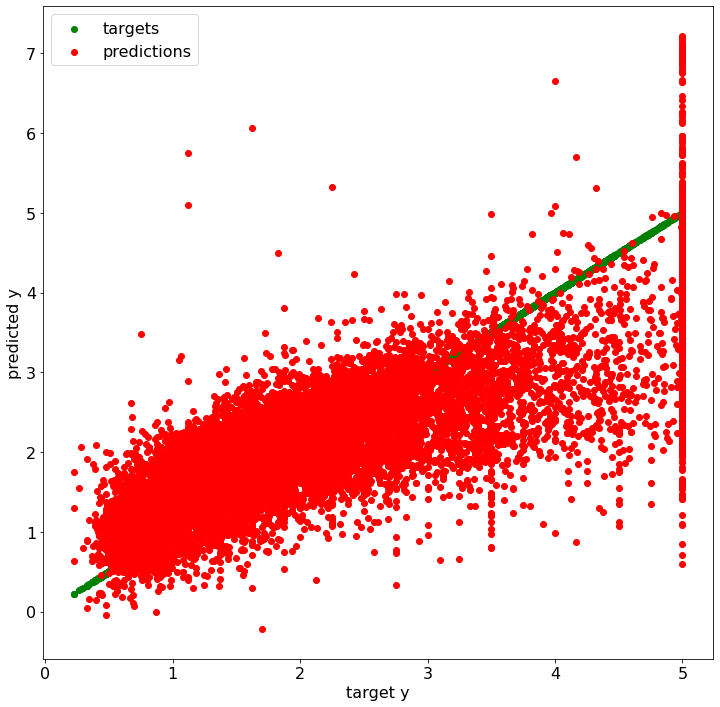

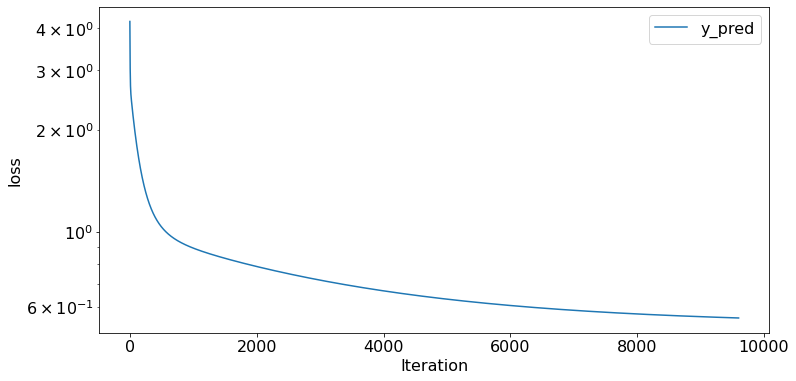

In [13]:
theta = torch.rand(1, X.shape[1] + 1).requires_grad_()

theta_opt, loss_value = train_proc(X_train, theta, y_train,
                                   forward_fcn=linear_regression, lr=0.001, batch_size=64, num_iter=150)

y_train_pred = linear_regression(X_train, theta_opt)
mse_opt = loss_func(y_train, y_train_pred)
print('MSE optimal = %.5f' % mse_opt.item())

plot_peds_vs_targets(y_train, y_train_pred)
plot_loss(loss_value)

**5.** Реализуйте поиск шага обучения и размера батча по валидации

In [16]:
lr = [0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
batch_size = [16, 32, 64, 128, 256]

best_mse = None
best_lr = None
best_batch_size = None


print(f"Best parameters:\nLearning rate: {best_lr}, batch size: {best_batch_size} with Val MSE = {best_mse:.5f}")

Learning rate: 0.001, batch size: 16
Val MSE = 0.64917
Learning rate: 0.001, batch size: 32
Val MSE = 0.53257
Learning rate: 0.005, batch size: 16
Val MSE = 0.51253
Learning rate: 0.005, batch size: 32
Val MSE = 0.50246
Best parameters:
Learning rate: 0.005, batch size: 32 with Val MSE = 0.50246


**6.** Обучите модель с лучшими параметрами. Выполните оценку и визуализацию работы модели.

Train MSE = 0.530


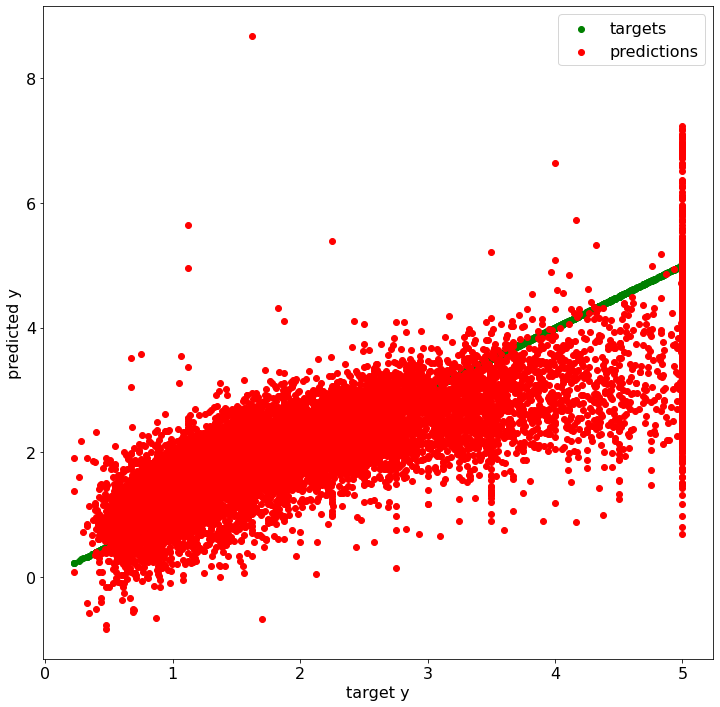

Val MSE = 0.502


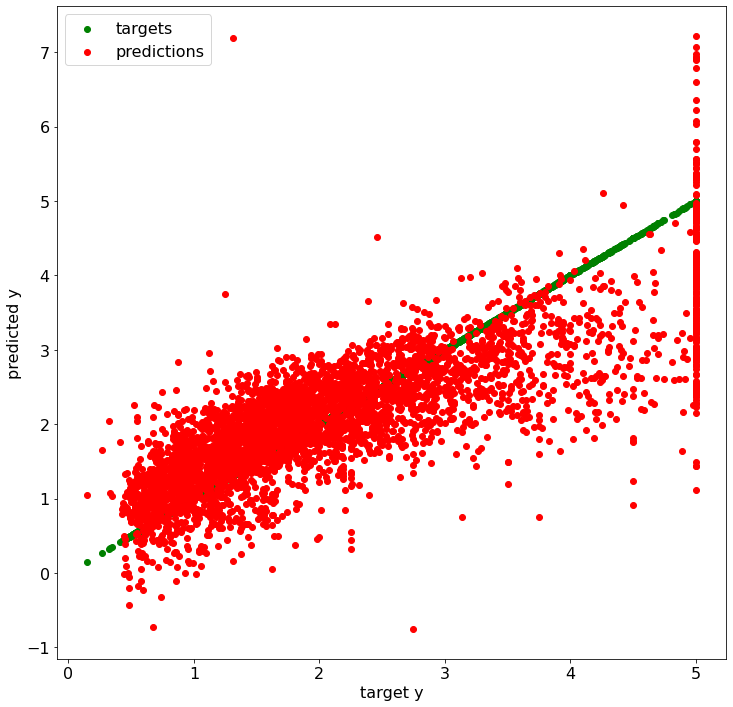

Test MSE = 0.533


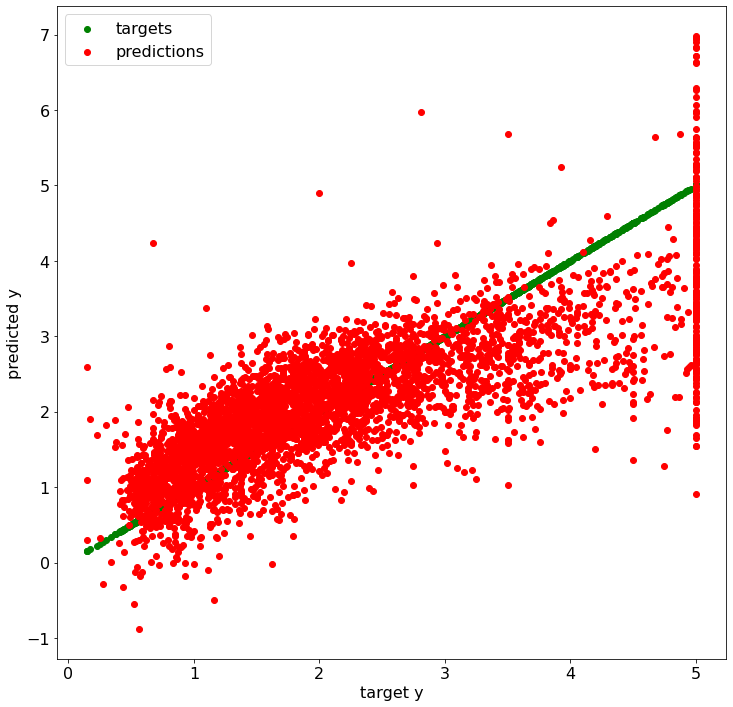

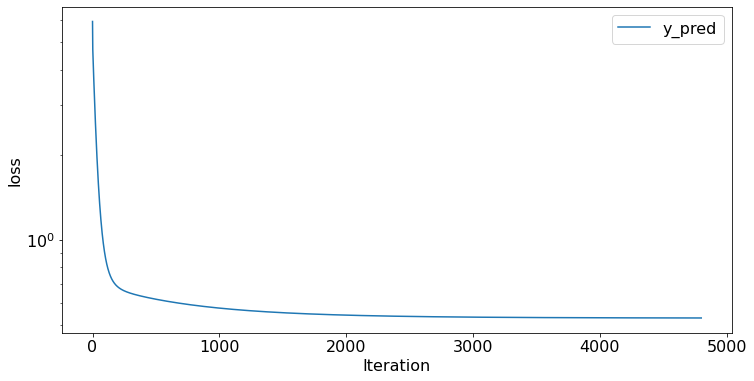